## 개념
* 새로운 데이터가 입력되었을 때, 기존 데이터를 활용해 분류하는 기법.
* 패턴 인식, 자료 분석등 지도학습에 사용
* 최대 마진 분류기를 일반화 한 것
* 비선형 클래스의 경계를 수용하기 위해 고안됨
* https://bskyvision.com/entry/%EC%84%9C%ED%8F%AC%ED%8A%B8-%EB%B2%A1%ED%84%B0-%EB%A8%B8%EC%8B%A0SVM%EC%9D%98-%EC%82%AC%EC%9A%A9%EC%9E%90%EB%A1%9C%EC%84%9C-%EA%BC%AD-%EC%95%8C%EC%95%84%EC%95%BC%ED%95%A0-%EA%B2%83%EB%93%A4-%EB%A7%A4%EA%B0%9C%EB%B3%80%EC%88%98-C%EC%99%80-gamma

### 용어 정리 
* 결정 경계: 서로 다른 분류값을 결정하는 경계('초평면'이라고도 함)
* 서포터 벡터: 결정 경계선과 가장 가까이 맞닿는 데이터 포인터
* 마진: 결정경계와 서포터 벡터 사이의 거리
* 비용(Cost):약간의 오류를 허용하기 위해 사용.(마진너비 조절변수)
    - 비용이 낮을수록 마진을 최대한 높이고, 학습에러율이 증가 -> 과소적합의 위험
    - 비용이 높을수록 마진을 최대한 낮아지고, 학습에러율이 감소  -> 과대적합의 위험
* 커널트릭
    - 선형분리가 주어진 차원에서 불가할 경우, 고차원으로 데이터를 옮기는 효과를 통해결정
    - 비용과 gamma을 조절해서 마진 조절
* 감마:커널의 표준편차 조절 변수.작을수록 데이터 포인터 영향이 커져서 경계가 완만해지고, 클수록 경계가 구부러진다.
* 선형SVM: 커널을 사용하지 않고 데이터를 분류. 비용을 조절해서 마진의 크기를 조절

### 장점
* 커널트릭을사용함으로써 특성이 다양한 대이터를 분류하는데 강함
* N개의 특성을 가진 데이터는 N차원 공간의 데이터 포인트로 표현되고, N차원 공간또는 그이상 공간에서 초평면을 찾아 분류
* 파라미터(C, gamma)을 조정하여 과대적합, 과소적합에 대처 가능
* 적은 학습데이터로 딥런링만큼 높은 성과 기대
* 고차원 저차원 모드 잘 작동

### 단점
* 전처리 과정이 중요.특성이 다양하거나 확연히 다른 경우는 전처리 과정 필수
* 특성이 많은 경우 결정 경계 및 시각화가 어렵다.
* 대용량에서 잘 작동하지 않음
* 모델 설명이 어렵다.

## Linear SVC
* 분류 분석 구현

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

c= pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/classification.csv")
c

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0
...,...,...,...
292,27.697220,18.799309,0.0
293,15.150959,72.000352,1.0
294,22.264378,68.453459,1.0
295,25.677420,90.118212,1.0


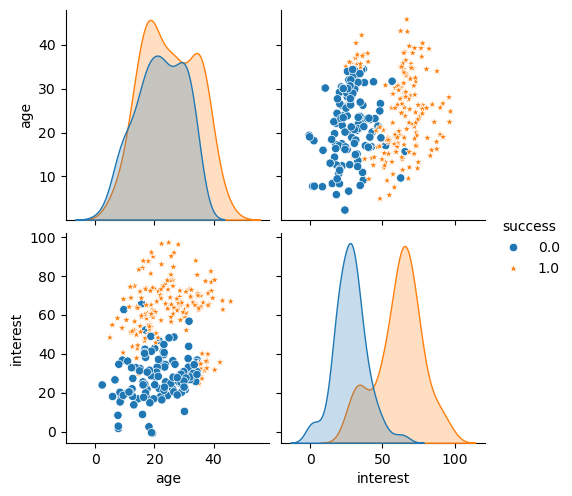

In [13]:
sns.pairplot(data=c,hue='success',markers=['o', '*'])
# sns.pairplot(data=body,hue='class')

In [14]:
from sklearn.model_selection import train_test_split
x=c[['age','interest']]
y=c[['success']]
train_x, test_x,train_y, test_y = train_test_split(x,y,stratify=y,train_size=0.7,random_state=1)
train_x.shape, test_x.shape,train_y.shape, test_y.shape

((207, 2), (90, 2), (207, 1), (90, 1))

In [15]:
from sklearn.preprocessing import StandardScaler
ss_age=StandardScaler()
ss_int=StandardScaler()
train_x['age'] = ss_age.fit_transform(train_x[['age']])
train_x['interest'] = ss_int.fit_transform(train_x[['interest']])

test_x['age'] = ss_age.transform(test_x[['age']])
test_x['interest'] = ss_int.transform(test_x[['interest']])

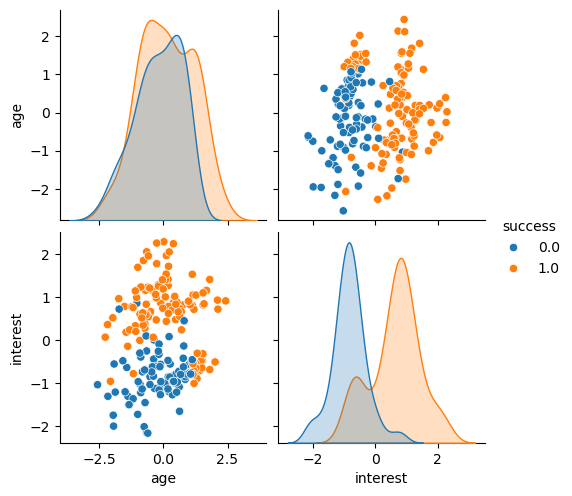

In [16]:
sns.pairplot(data=pd.concat([train_x,train_y],axis=1),hue='success')  

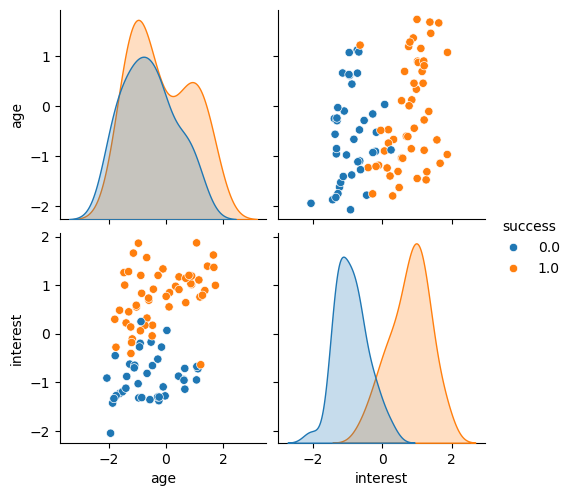

In [17]:
sns.pairplot(data=pd.concat([test_x,test_y],axis=1),hue='success')

In [18]:
from sklearn.svm import SVC
clf= SVC(C=0.5, random_state=45,probability=True)
clf.fit(train_x,train_y)
pred = clf.predict(test_x)
pred_p = clf.predict_proba(test_x)

In [19]:
pred

array([1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 0., 1., 1., 0.])

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score
# import sklearn
# dir(sklearn.metrics)
test_cm = confusion_matrix(test_y,pred)
test_acc = accuracy_score(test_y,pred)
test_prc = precision_score(test_y,pred)
test_rcll = recall_score(test_y,pred)
test_f1 = f1_score(test_y,pred)
test_cm,test_acc,test_prc,test_rcll,test_f1

(array([[37,  2],
        [ 2, 49]], dtype=int64),
 0.9555555555555556,
 0.9607843137254902,
 0.9607843137254902,
 0.9607843137254902)

In [21]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.svm import LinearSVC
# plt.figure(figsize=(10, 5))
# for i, C in enumerate([1, 500]):
#   clf = LinearSVC(C=C, loss='hinge', random_state=42).fit(train_x, train_y)
#   # decision function으로 서포트 벡터 얻기
#   decision_function = clf.decision_function(train_x)
#   support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
#   support_vectors = train_x[support_vector_indices]
#   plt.subplot(1, 2, i + 1)
#   plt.scatter(train_x[:, 0], train_x[:, 1], c=train_y, s=30, cmap =plt.cm.Paired)
#   ax = plt.gca()
#   xlim = ax.get_xlim()
#   ylim = ax.get_ylim()
#   xx, yy = np.meshgrid( np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50) )
#   Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
#   Z = Z.reshape(xx.shape)
#   plt.contour( xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'], )
#   plt.scatter( support_vectors[:, 0], support_vectors[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k', )
#   plt.title('C=' + str(C))
# plt.tight_layout()
# plt.show()

## Linear SVR
* 회귀분석

In [45]:
import numpy as np
x=np.sort(5* np.random.rand(40,1),axis=0)
y=np.sin(x).ravel()
x[0:6]
y[0:10]

array([0.23144739, 0.31046358, 0.6422613 , 0.77409172, 0.79322257,
       0.83870505, 0.95967212, 0.9702639 , 0.98971224, 0.99902538])

In [47]:
y[::5] += 3*(0.5 - np.random.rand(8))

In [61]:
from sklearn.svm import SVR
svr_rbf= SVR(kernel= 'rbf',C=100,gamma=0.1,epsilon=0.1)
# svr_lin= SVR(kernel= 'linear',C=100,gamma='auto')
# svr_poly= SVR(kernel= 'poly',C=100,gamma='auto',epsilon=0.1,degree=3,coef0=1)
svr_lin= SVR(kernel= 'linear',C=100,gamma='auto',epsilon=0.1)
svr_poly= SVR(kernel= 'poly',C=100,gamma=0.1,epsilon=0.1)

svr_rbf.fit(x,y)
svr_lin.fit(x,y)
svr_poly.fit(x,y)

pred_rbf = svr_rbf.predict(x)
pred_lin = svr_lin.predict(x)
pred_poly = svr_poly.predict(x)

In [63]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
preds=[pred_rbf,pred_lin, pred_poly]
kernel=['rbf','Linear','Poly_pred']
evls=['mse','rmse','mae']

results= pd.DataFrame(index=kernel,columns=evls)
for pred, nm in zip(preds, kernel):
  mse=mean_squared_error(y,pred)
  mae=mean_absolute_error(y,pred)
  rmse=np.sqrt(mse)
  results.loc[nm]['mse']=round(mse,2)
  results.loc[nm]['rmse']=round(rmse,2)
  results.loc[nm]['mae']=round(mae,2)
results

,mse,rmse,mae
rbf,0.1,0.31,0.18
Linear,0.33,0.57,0.35
Poly_pred,0.18,0.42,0.3


In [ ]:
	mse	rmse	mae
rbf	0.1	0.31	0.18
Linear	0.33	0.57	0.35
Poly_pred	0.18	0.42	0.3

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.preprocessing import StandardScaler

# 데이터셋 로드
iris = datasets.load_iris()
X = iris.data[:, :2]  # 특성으로 꽃받침 길이와 너비만 사용
y = iris.target

# 이진 분류를 위해 클래스 0과 1만 선택
X = X[y != 2]
y = y[y != 2]

# 데이터 표준화
scaler = StandardScaler()
X = scaler.fit_transform(X)

# SVM 모델 학습
model = svm.SVC(kernel='linear')
model.fit(X, y)
model.coef_, model.intercept_

(array([[ 1.93278011, -1.61696669]]), array([0.27343523]))

In [ ]:
# 가중치 벡터 및 편향
w = model.coef_[0]
b = model.intercept_[0]

# 마진 계산
margin = 2 / np.linalg.norm(w)
print(f'Margin: {margin}')

# 시각화를 통해 확인
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# 결정 경계 그리기
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# 결정 경계 및 마진 경계 그리기
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()